In [160]:
%matplotlib inline

from math import sqrt

import numpy as np
import pandas as pd

In [163]:
horsey = pd.read_csv('../data/horsey.csv', parse_dates=['round_date'])

In [164]:
print(horsey.iloc[0])

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [165]:
horsey.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,name,course_id,start_tee,score,par,yards,lie_after,lie_before,club,direction
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Tee,iron,center
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Green,putter,short
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Hole,Green,putter,center
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Tee,driver,center
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Fairway,iron,center


In [223]:
# add some columns

df = horsey.copy()
df['is_putt'] = df['putt'] == True
df['score_norm'] = df['score'] - df['par']
df['hole_norm'] = df.apply(lambda r: (r['hole_no'] - r['start_tee']) % 18, axis=1)


# convert distance to pin to feet, yards, bins, etc.

def bin_num(x, base):
    if pd.isnull(x):
        return x
    return int(x - (x % base))

df['pre_ft'] = df['left_to_pin_before'] / 12.0
df['pre_yd'] = df['left_to_pin_before'] / 36.0
df['pre_ft_bin5'] = df['pre_ft'].apply(lambda x: bin_num(x, 5))
df['pre_yd_bin10'] = df['pre_yd'].apply(lambda x: bin_num(x, 10))
df['pre_yd_bin25'] = df['pre_yd'].apply(lambda x: bin_num(x, 25))

df['post_ft'] = df['left_to_pin_after'] / 12.0
df['post_yd'] = df['left_to_pin_after'] / 36.0
df['post_ft_bin5'] = df['post_ft'].apply(lambda x: bin_num(x, 5))
df['post_yd_bin10'] = df['post_yd'].apply(lambda x: bin_num(x, 10))
df['post_yd_bin25'] = df['post_yd'].apply(lambda x: bin_num(x, 25))

df.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,...,pre_ft,pre_yd,pre_ft_bin5,pre_yd_bin10,pre_yd_bin25,post_ft,post_yd,post_ft_bin5,post_yd_bin10,post_yd_bin25
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,...,630.0,210.000000,630,210,200,30.000000,10.000000,30.0,10.0,0.0
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,...,30.0,10.000000,30,10,0,1.000000,0.333333,0.0,0.0,0.0
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,...,1.0,0.333333,0,0,0,0.083333,0.027778,0.0,0.0,0.0
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,...,1620.0,540.000000,1620,540,525,777.000000,259.000000,775.0,250.0,250.0
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,...,777.0,259.000000,775,250,250,210.000000,70.000000,210.0,70.0,50.0


In [175]:
putts = df[(df.putt == True) & (df.club == 'putter')].copy()

putts['made_it'] = putts['lie_after'] == 'Hole'
putts['putts_needed'] = putts['score'] - putts['shot_no'] + 1

cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no',
    'left_to_pin_before', 'left_to_pin_after', 'score', 'par', 'direction',
    'made_it', 'pre_ft', 'post_ft', 'putts_needed', 
]

putts = putts[cols]
putts.head(20)

,round_date,round_no,hole_no,shot_no,left_to_pin_before,left_to_pin_after,score,par,direction,made_it,pre_ft,post_ft,putts_needed
1,2016-11-18,2,13,2,360,12.0,3,3,short,False,30.0,1.000000,2
2,2016-11-18,2,13,3,12,1.0,3,3,center,True,1.0,0.083333,1
6,2016-11-18,2,18,4,72,1.0,4,5,center,True,6.0,0.083333,1
11,2016-11-19,3,2,5,48,1.0,5,5,center,True,4.0,0.083333,1
14,2016-11-19,3,1,3,216,1.0,3,4,center,True,18.0,0.083333,1
17,2016-11-19,3,3,3,600,60.0,4,4,long right,False,50.0,5.000000,2
18,2016-11-19,3,3,4,60,1.0,4,4,center,True,5.0,0.083333,1
20,2016-11-19,3,4,2,540,72.0,3,3,long right,False,45.0,6.000000,2
21,2016-11-19,3,4,3,72,1.0,3,3,center,True,6.0,0.083333,1
23,2016-11-10,1,9,4,324,12.0,5,5,left,False,27.0,1.000000,2


In [176]:
aggs = {
    'made_it': {
        'putts': len,
        'make': lambda x: sum(x) / len(x),
    },
    'putts_needed': {
        '1': lambda x: (x == 1).sum(),
        '2': lambda x: (x == 2).sum(),
        '3': lambda x: (x == 3).sum(),
    }
}

putt_stats = putts.groupby('pre_ft').agg(aggs).reset_index()

putt_stats['fractional_par'] = putt_stats.apply(
    lambda r: sum([
        r['putts_needed'][num] / r['made_it']['putts'] * float(num)
        for num in ['1', '2', '3']
    ]),
    axis=1
)

putt_stats[:15]

pre_ft made_it           putts_needed        fractional_par
            putts      make            1   2  3               
0     1.0     438  1.000000          438   0  0       1.000000
1     2.0      81  0.987654           80   1  0       1.012346
2     3.0      67  0.940299           63   4  0       1.059701
3     4.0      39  0.897436           35   3  1       1.128205
4     5.0      56  0.750000           42  14  0       1.250000
5     6.0      45  0.644444           29  15  1       1.377778
6     7.0      42  0.714286           30  11  1       1.309524
7     8.0      35  0.514286           18  17  0       1.485714
8     9.0      52  0.461538           24  28  0       1.538462
9    10.0      31  0.516129           16  15  0       1.483871
10   11.0      19  0.315789            6  13  0       1.684211
11   12.0      39  0.615385           24  15  0       1.384615
12   13.0      12  0.333333            4   8  0       1.666667
13   14.0      12  0.333333            4   8  0       1.666667
14   15.0      50  0.240000           12  38  0       1.760000

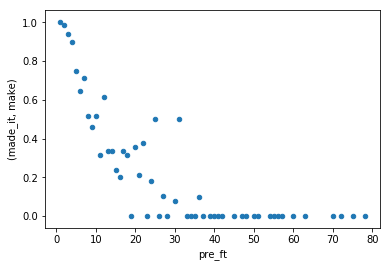

In [177]:
putt_stats.plot(kind='scatter', x='pre_ft', y=('made_it', 'make'))

In [178]:
# misreads / bad putts

g = putts.groupby('round_date')

miss_summary = g['post_ft'].agg({
    'putts': len,
    'miss_gt_4': lambda x: (x >= 4).sum(),
    'miss_gt_6': lambda x: (x >= 6).sum(),
})

miss_summary.head(10)

,putts,miss_gt_4,miss_gt_6
round_date,,,
2016-06-23,30.0,1.0,1.0
2016-06-24,30.0,1.0,1.0
2016-06-25,26.0,1.0,0.0
2016-06-26,25.0,2.0,1.0
2016-06-30,33.0,3.0,0.0
2016-07-01,34.0,2.0,1.0
2016-07-07,30.0,3.0,2.0
2016-07-08,32.0,2.0,1.0
2016-08-18,31.0,5.0,0.0


In [179]:
miss_summary.describe()

,putts,miss_gt_4,miss_gt_6
count,49.000000,49.000000,49.000000
mean,28.346939,1.204082,0.510204
std,2.194226,1.172241,0.710705
min,23.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000
75%,30.000000,2.000000,1.000000
max,34.000000,5.000000,2.000000


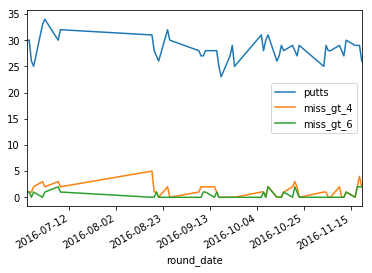

In [180]:
miss_summary.plot()

In [181]:
# misses under 10 feet

miss_lt_10 = putts.query('pre_ft <= 10 & made_it == False').copy()
miss_lt_10.groupby('direction').size().sort_values(ascending=False)

direction
right         53
left          43
long right     9
long left      3
short left     2
short          1
dtype: int64

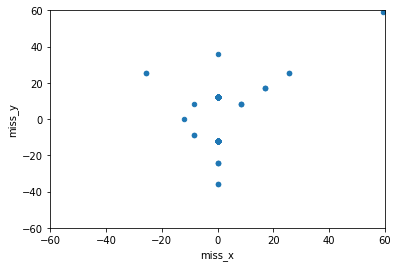

In [182]:
# plot misses

directions = {
    'long': [0, 1],
    'long right': [1, 1],
    'right': [0, 1],
    'short right': [1, -1],
    'short': [-1, 0],
    'short left': [-1, -1],
    'left': [0, -1],
    'long left': [-1, 1],
}

def make_coord(row):
    pt, inches = directions[row['direction']], row['left_to_pin_after']
    is_diagonal = pt[0] != 0 and pt[1] != 0
    pt = [p * inches / (sqrt(2) if is_diagonal else 1) for p in pt]
    return pd.Series(pt)


miss_lt_10[['miss_x', 'miss_y']] = miss_lt_10.apply(make_coord, axis=1)

miss_lt_10 \
    .query('left_to_pin_after < 300') \
    .plot(kind='scatter', x='miss_x', y='miss_y', xlim=(-60, 60), ylim=(-60, 60))

In [184]:
# approach game

approach = df.query('club != "driver" & club != "putter"').copy()
approach = approach.query('pre_yd >= 50 & pre_yd < 250')
approach = approach.query('lie_before != "Tee" & par != 3')

print(len(approach))
print(approach.groupby('lie_before').size())

688
lie_before
Fairway               456
Fairway Bunker         26
Greenside Bunker        1
Intermediate Rough     90
Other                   8
Rough                 107
dtype: int64


In [185]:
g = approach.groupby('pre_yd_bin10')

a_summary = g['post_ft'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
    'std': np.std,
})

a_summary

,shots,mean,median,std
pre_yd_bin10,,,,
50,17.0,22.588235,9.0,29.430127
60,21.0,20.904762,12.0,24.576218
70,23.0,14.869565,10.0,11.318948
80,24.0,23.708333,12.0,25.162911
90,25.0,21.400000,20.0,16.595682
100,36.0,16.611111,16.0,9.681434
110,24.0,19.913043,16.0,12.587559
120,52.0,18.250000,15.0,14.006826
130,42.0,27.952381,21.5,34.437609


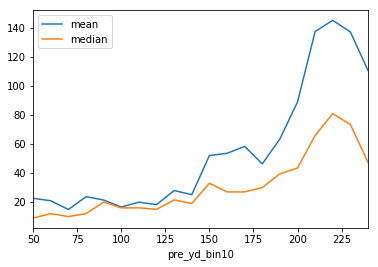

In [186]:
a_summary.plot(y=['mean', 'median'])

In [188]:
# rough penalty

lies = ['Fairway', 'Intermediate Rough', 'Rough']
fair_v_rough = approach[
    (approach.lie_before.isin(lies)) &
    (approach.pre_yd < 200)
].copy()

fair_v_rough.groupby('pre_yd_bin25').size()

pre_yd_bin25
50      48
75      60
100     85
125    119
150    130
175    123
dtype: int64

In [189]:
g = fair_v_rough.groupby(['pre_yd_bin25', 'lie_before'])

g['post_ft'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
}).unstack()

shots                                mean                     \
lie_before   Fairway Intermediate Rough Rough    Fairway Intermediate Rough   
pre_yd_bin25                                                                  
50              25.0               11.0  12.0  11.920000          18.909091   
75              48.0                9.0   3.0  20.708333          20.777778   
100             65.0               11.0   9.0  17.384615          12.272727   
125             86.0               19.0  14.0  19.441860          23.789474   
150             91.0               16.0  23.0  28.351648          27.500000   
175             84.0               19.0  20.0  31.797619          43.315789   

                          median                            
lie_before         Rough Fairway Intermediate Rough  Rough  
pre_yd_bin25                                                
50             26.250000     8.0                7.0   26.5  
75             38.000000    13.5               21.0   27.0  
100            26.750000    16.0               12.0   21.5  
125            52.357143    15.0               24.0   46.5  
150            89.173913    27.0               25.5   45.0  
175           141.450000    27.0               42.0  102.0

In [190]:
scoring = fair_v_rough.pivot_table(
    'score_norm',
    index=['pre_yd_bin25'],
    columns=['lie_before'],
    aggfunc=np.mean,
    fill_value=0
)

scoring['diff'] = scoring['Rough'] - scoring['Fairway']
scoring

lie_before,Fairway,Intermediate Rough,Rough,diff
pre_yd_bin25,,,,
50,-0.280000,-0.363636,0.333333,0.613333
75,-0.041667,-0.111111,0.000000,0.041667
100,-0.230769,-0.545455,0.555556,0.786325
125,-0.162791,-0.263158,0.285714,0.448505
150,-0.087912,-0.250000,0.434783,0.522695
175,-0.107143,0.157895,0.400000,0.507143


In [191]:
# driver misses

locs = ['center', 'left', 'right']
drives = df.query('club == "driver" & direction == {}'.format(locs)).copy()

g = drives.groupby('direction')
g.size() / g.size().sum()

direction
center    0.642978
left      0.147208
right     0.209814
dtype: float64

In [192]:
g['score_norm'].agg({
    'mean': np.mean,
    'std': np.std,
    'drives': len,
})

,mean,std,drives
direction,,,
center,-0.242105,0.615813,380
left,0.126437,1.032097,87
right,0.217742,0.879398,124


direction  center  left  right  total  center_p    left_p   right_p
hole_norm                                                          
0              26     5      7     38  0.684211  0.131579  0.184211
1              16    11      6     33  0.484848  0.333333  0.181818
2              26     8      9     43  0.604651  0.186047  0.209302
3              10     4      3     17  0.588235  0.235294  0.176471
4              19     7     12     38  0.500000  0.184211  0.315789
5              22     4      9     35  0.628571  0.114286  0.257143
6              18     2      2     22  0.818182  0.090909  0.090909
7              17     3      4     24  0.708333  0.125000  0.166667
8              33     2     11     46  0.717391  0.043478  0.239130
9              27     2      5     34  0.794118  0.058824  0.147059
10             18     4      6     28  0.642857  0.142857  0.214286
11             24     8      7     39  0.615385  0.205128  0.179487
12             15     3      7     25  0.600000 

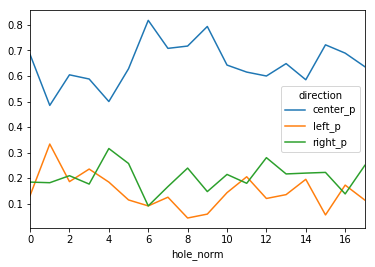

In [193]:
by_hole = drives.groupby(['hole_norm', 'direction']).size().unstack()
by_hole['total'] = by_hole.sum(axis=1)

for c in ['center', 'left', 'right']:
    by_hole['{}_p'.format(c)] = by_hole[c] * 1.0 / by_hole.total

print(by_hole)
by_hole.ix[:, -3:].plot()

In [200]:
# par 5 analysis

LAYUP_THRESHOLD = 50 # yards
par5 = df.query('par == 5').copy()
par5_s2 = df.query('par == 5 & shot_no == 2').copy()

par5_s2['went_for_it'] = par5_s2['post_yd'] < LAYUP_THRESHOLD
par5_s2.groupby('went_for_it')['score_norm'].agg({ 'num': len, 'avg': np.mean })

,num,avg
went_for_it,,
False,116,-0.241379
True,54,-0.703704


In [201]:
g = par5_s2.groupby(['lie_before', 'went_for_it'])

s2_lie = g['score_norm'].agg({ 'num': len, 'avg': np.mean }).unstack()
s2_lie['diff'] = s2_lie['avg', True] - s2_lie['avg', False]
s2_lie

num             avg                diff
went_for_it        False  True     False      True          
lie_before                                                  
Fairway             60.0  45.0 -0.333333 -0.688889 -0.355556
Fairway Bunker       4.0   NaN  0.000000       NaN       NaN
Intermediate Rough  25.0   7.0 -0.480000 -0.857143 -0.377143
Other                3.0   NaN  0.000000       NaN       NaN
Rough               24.0   2.0  0.166667 -0.500000 -0.666667

In [204]:
g = par5_s2.groupby(['pre_yd_bin25', 'went_for_it'])

s2_dist = g['score_norm'].agg({ 'num': len, 'avg': np.mean }).unstack()
s2_dist['num'] =  s2_dist['num'].fillna(0)
s2_dist['score_diff'] = s2_dist['avg', True] - s2_dist['avg', False]

s2_dist

num             avg           score_diff
went_for_it  False  True     False      True           
pre_yd_bin25                                           
175            0.0   5.0       NaN -0.600000        NaN
200            3.0   3.0 -1.000000 -1.000000   0.000000
225            6.0  17.0 -0.166667 -0.823529  -0.656863
250           21.0  21.0 -0.333333 -0.571429  -0.238095
275           37.0   8.0 -0.297297 -0.750000  -0.452703
300           21.0   0.0 -0.380952       NaN        NaN
325           20.0   0.0  0.050000       NaN        NaN
350            6.0   0.0 -0.166667       NaN        NaN
375            2.0   0.0  1.000000       NaN        NaN

In [205]:
# strokes gained

sg = df.copy()

sg.sort_values(by=['round_date', 'round_no', 'hole_no', 'shot_no'], ascending=[1, 1, 1, 1], inplace=True)
sg.reset_index(inplace=True, drop=True)

sg = sg.reset_index()
sg['has_next_shot'] = sg['shot_no'] != sg['score']
sg['next_shot_idx'] = sg.apply(lambda r: r['index'] + 1 if r['has_next_shot'] else -1, axis=1)
sg['shots_left'] = sg['score'] - sg['shot_no'] + 1

sg.head()

,index,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,...,pre_yd_bin10,pre_yd_bin25,post_ft,post_yd,post_ft_bin5,post_yd_bin10,post_yd_bin25,has_next_shot,next_shot_idx,shots_left
0,0,2016-06-23,1,1,1,NaN,True,12672,4644.0,NaN,...,350,350,387.000000,129.000000,385.0,120.0,125.0,True,1,3
1,1,2016-06-23,1,1,2,False,True,4644,72.0,NaN,...,120,125,6.000000,2.000000,5.0,0.0,0.0,True,2,2
2,2,2016-06-23,1,1,3,True,True,72,1.0,NaN,...,0,0,0.083333,0.027778,0.0,0.0,0.0,False,-1,1
3,3,2016-06-23,1,2,1,NaN,True,15120,5436.0,NaN,...,420,400,453.000000,151.000000,450.0,150.0,150.0,True,4,4
4,4,2016-06-23,1,2,2,NaN,True,5436,360.0,NaN,...,150,150,30.000000,10.000000,30.0,10.0,0.0,True,5,3


In [206]:
# categorize shots (to facilitate grouping and averaging # shots to complete hole)

def categorize(row):
    is_putt = row.is_putt
    ft, ft5, yds25 = list(map(round, [row.pre_ft, row.pre_ft_bin5, row.pre_yd_bin25]))
    
    if is_putt:
        return 'p_{}_ft'.format(ft if ft < 10 else '{}_to_{}'.format(ft5, ft5 + 5))
    else:
        return 'o_{}_to_{}_yds'.format(yds25, yds25 + 25)

sg['category'] = sg.apply(categorize, axis=1)

In [208]:
# check that category values seem reasonable

cols = ['round_no', 'hole_no', 'shot_no', 'lie_before', 'pre_yd', 'category']
sg[cols].head(10)

,round_no,hole_no,shot_no,lie_before,pre_yd,category
0,1,1,1,Tee,352.000000,o_350_to_375_yds
1,1,1,2,Rough,129.000000,o_125_to_150_yds
2,1,1,3,Green,2.000000,p_6_ft
3,1,2,1,Tee,420.000000,o_400_to_425_yds
4,1,2,2,Fairway,151.000000,o_150_to_175_yds
5,1,2,3,Green,10.000000,p_30_to_35_ft
6,1,2,4,Green,0.333333,p_1_ft
7,1,3,1,Tee,540.000000,o_525_to_550_yds
8,1,3,2,Intermediate Rough,276.000000,o_275_to_300_yds
9,1,3,3,Fairway,133.000000,o_125_to_150_yds


In [209]:
# compute average # of shots left, grouped by category
# (this is the baseline for shots gained stat) 

sg_baseline = sg.groupby('category').agg({ 'shots_left': np.mean })

# convert to dict
baseline_lookup = sg_baseline.to_dict()['shots_left']
baseline_lookup['done'] = 0

sg_baseline.head()

,shots_left
category,
o_0_to_25_yds,2.270042
o_100_to_125_yds,2.755556
o_125_to_150_yds,2.813433
o_150_to_175_yds,2.984375
o_175_to_200_yds,3.085427


In [219]:
# join with itself to get category of next_shot (if available)

sg2 = pd.merge(
    sg,
    sg[['index', 'category', 'shots_left']],
    how='left',
    left_on='next_shot_idx',
    right_on='index',
    suffixes=('', '_next')
)
sg2.drop('index_next', axis=1, inplace=True)
sg2.category_next.fillna('done', inplace=True)

# handle cases where shot cost 2 strokes (i.e., had a penalty)
sg2.shots_left_next = sg2.shots_left_next.fillna(0).astype(int)
sg2['shots'] = sg2['shots_left'] - sg2['shots_left_next']

# add baseline #s to df, compute strokes gained per shot
sg2['baseline'] = sg2['category'].apply(lambda x: baseline_lookup[x])
sg2['baseline_next'] = sg2['category_next'].apply(lambda x: baseline_lookup[x])
sg2['strokes_gained'] = sg2['baseline'] - sg2['baseline_next'] - sg2['shots']

In [220]:
# check how things look

cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no', 'score', 'par', 'club', 'lie_before',
    'category', 'category_next', 'baseline', 'baseline_next', 'strokes_gained',
]

sg2 = sg2[cols]
sg2.head(20)

,round_date,round_no,hole_no,shot_no,score,par,club,lie_before,category,category_next,baseline,baseline_next,strokes_gained
0,2016-06-23,1,1,1,3,4,iron,Tee,o_350_to_375_yds,o_125_to_150_yds,3.830189,2.813433,0.016756
1,2016-06-23,1,1,2,3,4,iron,Rough,o_125_to_150_yds,p_6_ft,2.813433,1.377778,0.435655
2,2016-06-23,1,1,3,3,4,putter,Green,p_6_ft,done,1.377778,0.000000,0.377778
3,2016-06-23,1,2,1,4,4,driver,Tee,o_400_to_425_yds,o_150_to_175_yds,3.961165,2.984375,-0.023210
4,2016-06-23,1,2,2,4,4,iron,Fairway,o_150_to_175_yds,p_30_to_35_ft,2.984375,2.000000,-0.015625
5,2016-06-23,1,2,3,4,4,putter,Green,p_30_to_35_ft,p_1_ft,2.000000,1.000000,0.000000
6,2016-06-23,1,2,4,4,4,putter,Green,p_1_ft,done,1.000000,0.000000,0.000000
7,2016-06-23,1,3,1,4,5,driver,Tee,o_525_to_550_yds,o_275_to_300_yds,4.615385,3.640000,-0.024615
8,2016-06-23,1,3,2,4,5,iron,Intermediate Rough,o_275_to_300_yds,o_125_to_150_yds,3.640000,2.813433,-0.173433
9,2016-06-23,1,3,3,4,5,iron,Fairway,o_125_to_150_yds,p_8_ft,2.813433,1.485714,0.327719


In [221]:
# best shots

sg2.sort_values(by='strokes_gained', ascending=False).head(10)

,round_date,round_no,hole_no,shot_no,score,par,club,lie_before,category,category_next,baseline,baseline_next,strokes_gained
2529,2016-10-23,4,5,3,3,5,iron,Fairway,o_25_to_50_yds,done,2.718750,0.000000,1.718750
2546,2016-10-23,4,10,3,3,4,putter,Green Fringe,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1422,2016-09-17,3,1,4,4,5,putter,Green Fringe,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1210,2016-09-10,3,17,3,3,4,putter,Green Fringe,o_0_to_25_yds,done,2.270042,0.000000,1.270042
2906,2016-11-10,1,16,2,2,3,wedge,Fairway,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1549,2016-09-18,4,17,3,3,4,putter,Green Fringe,o_0_to_25_yds,done,2.270042,0.000000,1.270042
2233,2016-10-15,3,16,2,2,3,putter,Green Fringe,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1455,2016-09-17,3,10,2,2,3,wedge,Intermediate Rough,o_0_to_25_yds,done,2.270042,0.000000,1.270042
3069,2016-11-13,4,2,2,4,5,fw wood,Intermediate Rough,o_250_to_275_yds,p_6_ft,3.553191,1.377778,1.175414
1894,2016-10-07,2,17,2,3,4,iron,Fairway,o_200_to_225_yds,p_1_ft,3.147826,1.000000,1.147826


In [224]:
# worst shots

sg2.sort_values(by='strokes_gained', ascending=False).tail(10)

,round_date,round_no,hole_no,shot_no,score,par,club,lie_before,category,category_next,baseline,baseline_next,strokes_gained
840,2016-08-21,4,12,2,6,5,fw wood,Fairway,o_250_to_275_yds,o_100_to_125_yds,3.553191,2.755556,-1.202364
1070,2016-09-08,1,17,1,6,4,driver,Tee,o_375_to_400_yds,o_200_to_225_yds,3.898551,3.147826,-1.249275
3022,2016-11-12,3,9,2,6,5,iron,Fairway,o_225_to_250_yds,o_75_to_100_yds,3.306122,2.672131,-1.366009
1858,2016-10-07,2,7,3,4,4,putter,Green,p_10_to_15_ft,p_30_to_35_ft,1.522124,2.000000,-1.477876
954,2016-08-26,2,4,4,7,5,iron,Rough,o_100_to_125_yds,o_0_to_25_yds,2.755556,2.270042,-1.514487
1756,2016-09-24,3,18,2,5,4,iron,Intermediate Rough,o_200_to_225_yds,o_75_to_100_yds,3.147826,2.672131,-1.524305
889,2016-08-25,1,7,1,6,3,iron,Tee,o_175_to_200_yds,o_100_to_125_yds,3.085427,2.755556,-1.670128
287,2016-06-30,1,3,1,7,5,driver,Tee,o_550_to_575_yds,o_550_to_575_yds,4.553571,4.553571,-2.000000
432,2016-07-07,1,1,1,8,4,driver,Tee,o_425_to_450_yds,o_425_to_450_yds,4.042735,4.042735,-2.000000
3005,2016-11-12,3,5,3,8,4,wedge,Other,o_150_to_175_yds,o_150_to_175_yds,2.984375,2.984375,-2.000000
